# Analysis and Prediction GMSL

## Sea Level Rise Dataset (https://www.kaggle.com/nsidcorg/daily-sea-ice-extent-data)

Ovaj skup podataka sadrži ukupnu površina morskog leda za vremenski period od 1978. do 2015 godine.

Podaci koji su od interesa za naš rad su:

* Year - godina merenja
* Month - mesec merenja
* Day - dan merenja
* Extent - ukupna površina morskog leda izražena u jedinici 10^6 kvadratnih kilometar

In [300]:
import pandas as pd
import seaborn as sns

In [278]:
df = pd.read_csv('original_datasets/seaice.csv', delimiter=',')

In [279]:
df.head()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north


In [280]:
df.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data',
       'hemisphere'],
      dtype='object')

In [281]:
df.drop(['    Missing', ' Source Data'], axis=1, inplace=True)

In [282]:
df.rename(columns={'     Extent':'Extent'}, inplace = True)

In [283]:
df.head()

,Year,Month,Day,Extent,hemisphere
0,1978,10,26,10.231,north
1,1978,10,28,10.420,north
2,1978,10,30,10.557,north
3,1978,11,1,10.670,north
4,1978,11,3,10.777,north


In [284]:
df['Year'] = pd.to_datetime(df[['Year', ' Month', ' Day']].astype(str).agg('-'.join, axis=1))

In [285]:
df.head()

,Year,Month,Day,Extent,hemisphere
0,1978-10-26,10,26,10.231,north
1,1978-10-28,10,28,10.420,north
2,1978-10-30,10,30,10.557,north
3,1978-11-01,11,1,10.670,north
4,1978-11-03,11,3,10.777,north


In [286]:
df.drop([' Month', ' Day'], axis=1, inplace=True)
#df['Date'] = pd.to_datetime(df['Date'])

In [287]:
df.rename(columns={'Year':'Date'}, inplace = True)

In [288]:
df.head()

,Date,Extent,hemisphere
0,1978-10-26,10.231,north
1,1978-10-28,10.420,north
2,1978-10-30,10.557,north
3,1978-11-01,10.670,north
4,1978-11-03,10.777,north


In [289]:
#df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26354 entries, 0 to 26353
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        26354 non-null  datetime64[ns]
 1   Extent      26354 non-null  float64       
 2   hemisphere  26354 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 617.8+ KB


In [290]:
df.shape

(26354, 3)

In [291]:
df.describe()

,Extent
count,26354.000000
mean,11.494986
std,4.611734
min,2.080000
25%,7.601000
50%,12.217000
75%,15.114000
max,20.201000


In [292]:
df.isna().sum()

Date          0
Extent        0
hemisphere    0
dtype: int64

In [293]:
df.nunique()

Date          13177
Extent        13078
hemisphere        2
dtype: int64

#### Skup podataka ima 26354 redova, a duplikata ima 13177 iz razloga što za isti dan imamo zasebno zabeleženu debljinu leda na severnoj i južnoj hemisferi. Potrebno je da grupišemo podatke i izračunamo srednju vrednost.

In [294]:
duplicate_dates = df.duplicated(subset=['Date'], keep=False)
duplicate_dates
duplicate_dates_df = df.loc[duplicate_dates.values]
duplicate_dates_df.sort_values('Date').head(10)

,Date,Extent,hemisphere
0,1978-10-26,10.231,north
13177,1978-10-26,17.624,south
1,1978-10-28,10.420,north
13178,1978-10-28,17.803,south
2,1978-10-30,10.557,north
13179,1978-10-30,17.670,south
3,1978-11-01,10.670,north
13180,1978-11-01,17.527,south
4,1978-11-03,10.777,north
13181,1978-11-03,17.486,south


In [295]:
df.drop(['hemisphere'], axis=1, inplace=True)
df = df.groupby('Date').mean().reset_index()

In [296]:
df.shape

(13177, 2)

In [297]:
df.head()

,Date,Extent
0,1978-10-26,13.9275
1,1978-10-28,14.1115
2,1978-10-30,14.1135
3,1978-11-01,14.0985
4,1978-11-03,14.1315


In [299]:
df.nunique()

Date      13177
Extent     8344
dtype: int64

#### Sada smo dobili sve jedinstvene vrednosti datuma.

<AxesSubplot:xlabel='Extent'>

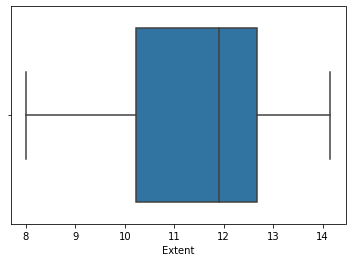

In [301]:
sns.boxplot(x=df['Extent'])

#### Proverili smo vrednosti i uočili da nema autlajera.
#### Obzirom da nam kod datuma dani nisu neophodni, potrebno je grupisati podatke po mesecima.

In [303]:
df['Date'] = df['Date'].dt.strftime('%Y-%m')
df.head()

,Date,Extent
0,1978-10,13.9275
1,1978-10,14.1115
2,1978-10,14.1135
3,1978-11,14.0985
4,1978-11,14.1315


In [308]:
df = df.groupby('Date').mean().reset_index()
df.head()

,Date,Extent
0,1978-10,14.050833
1,1978-11,13.770767
2,1978-12,12.031156
3,1979-01,10.408100
4,1979-02,9.658179


In [309]:
df.shape

(488, 2)

In [310]:
df.to_csv('processed_datasets/Extent.csv', index = False)